# LSTM(Long Short-Trem Memnory) & Bi-LSTM(Bi-Directional Long Short-Trem Memnory)

Download the data and preprocessing it.

In [47]:
import pandas as pd

# Reading the data and store them in DataFrame.
answer_all = pd.read_csv('../data/student1ch_expand.csv', encoding='utf-8')
question_all = pd.read_excel("../data/questions_ch.xlsx")
reference_all = pd.read_csv("../data/reference_answers_extended_ch.csv", encoding='utf-8')

# Extract the students` answers, the question`s describition and references of question 36.
answer_ext = answer_all[answer_all.Question_ID==36]
question_ext = question_all[question_all.Question_ID==36]
reference_ext = reference_all[reference_all.Question_ID==36]

In [48]:
answer_ext

,Question_ID,answer_text,answer_cut,words_num,score
0,36,动物细胞是指构成动物界中所有生物的细胞，由质膜，细胞质和真核组成。植物细胞含有诸如细胞壁，质...,动物细胞 是 指 构成 动物界 中 所有 生物 的 细胞 由 质膜 细胞质 和 真核 组成 ...,27,3
1,36,\像原核生物一样-因为有膜，所以不可见。前细菌\真核生物-可见是否存在于核膜中\例如：动植物...,像 原核 生物 一样 因为 有膜 所以 不 可见 前 细菌 真核 生物 可见 是否 存在 于...,21,1
2,36,在植物中，细胞中有一堵壁，而在动物细胞内衬有一层膜，而在动物细胞中则没有,在 植物 中 细胞 中有 一堵 壁 而 在 动物细胞 内衬 有 一层 膜 而 在 动物细胞 ...,19,2
3,36,植物细胞具有细胞壁,植物 细胞 具有 细胞壁,4,3
4,36,一个没有墙，另一个有,一个 没有 墙 另 一个 有,6,2
...,...,...,...,...,...
244,36,植物细胞具有细胞壁，而动物则没有。蔬菜有叶绿体,植物 细胞 具有 细胞壁 而 动物 则 没有 蔬菜 有 叶绿体,11,3
245,36,植物有叶绿体，疫苗，细胞壁，动物没有,植物 有 叶绿体 疫苗 细胞壁 动物 没有,7,2
246,36,游戏与植物进行光合作用,游戏 与 植物 进行 光合作用,5,1
247,36,蔬菜中含有叶绿体，而动物则不含。,蔬菜 中 含有 叶绿体 而 动物 则 不 含,9,3


In [49]:
reference_ext

,Question_ID,refence_text,answer_cut,words_num
0,36,动物细胞具有不规则形状，而植物细胞具有固定形状。植物细胞具有细胞壁，因为它是排他性的。动物细...,动物细胞 具有 不规则 形状 而 植物 细胞 具有 固定 形状 植物 细胞 具有 细胞壁 因...,26
1,36,在植物中，除质膜外，细胞还具有在其外部排列的壁。该细胞壁主要由纤维素形成，可确保对植物细胞具...,在 植物 中 除 质膜 外 细胞 还 具有 在 其 外部 排列 的 壁 该 细胞壁 主要 由...,36
2,36,在植物细胞中有叶绿体，纤维素细胞壁和搏动性空泡,在 植物 细胞 中有 叶绿体 纤维素 细胞壁 和 搏动 性 空泡,11
3,36,动植物细胞具有不同的形状。动物细胞具有不规则形状，而植物细胞具有固定形状。,动植物 细胞 具有 不同 的 形状 动物细胞 具有 不规则 形状 而 植物 细胞 具有 固定...,16
4,36,动物细胞是指构成动物界中所有生物的细胞，由质膜，细胞质和真核组成。植物细胞含有诸如细胞壁，质...,动物细胞 是 指 构成 动物界 中 所有 生物 的 细胞 由 质膜 细胞质 和 真核 组成 ...,27
5,36,空泡，质体和细胞壁的存在,空泡 质体 和 细胞壁 的 存在,6
6,36,细胞壁是植物细胞的独特结构。它对应于质膜外部的包装纸。,细胞壁 是 植物 细胞 的 独特 结构 它 对应 于 质膜 外部 的 包装纸,14
7,36,在将植物细胞与动物区分开的差异中，我们可以突出显示液泡，质体和细胞壁的存在。在细胞质中，一些...,在 将 植物 细胞 与 动物 区分 开 的 差异 中 我们 可以 突出 显示 液泡 质体 和...,31


In [50]:
question_ext

,Question_ID,问题文本
0,36,动物细胞和植物细胞有什么区别？


### Try to anylise the data.

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding, Bidirectional
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.callbacks import EarlyStopping

In [51]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = ['Arial Unicode MS']  # Show the Chinese words.(Mac OS)

/Users/zhangxin/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


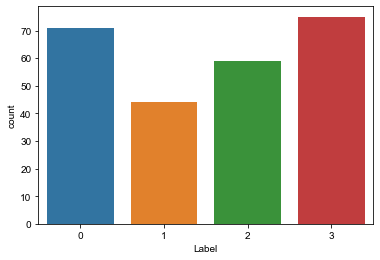

In [52]:
plt.figure()
sns.countplot(answer_ext.score)
plt.xlabel('Label', size = 10)
plt.xticks( size = 10)
plt.show()

count    249.000000
mean      10.389558
std        7.629847
min        0.000000
25%        6.000000
50%        8.000000
75%       14.000000
max       47.000000
Name: words_num, dtype: float64


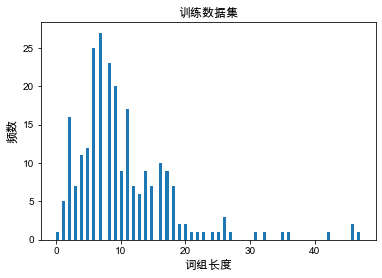

In [53]:
print(answer_ext.words_num.describe())
plt.figure()
plt.hist(answer_ext.words_num,bins=100)
plt.xlabel("词组长度",size = 12)
plt.ylabel("频数",size = 12)
plt.title("训练数据集")
plt.show()

Using one-hot encodding way to encode the lable of the data set.

In [54]:
le = LabelEncoder()
data_y = le.fit_transform(answer_ext.score).reshape(-1,1)

In [55]:
ohe = OneHotEncoder()
data_y = ohe.fit_transform(data_y).toarray()

### Using Tokenizer to encoding the word set.

In [66]:
max_words = 2000
max_len = 40
tok = Tokenizer(num_words=max_words)  ## The max word number is 5000
tok.fit_on_texts(answer_ext.answer_cut.astype(str))

In [58]:
for ii,iterm in enumerate(tok.word_index.items()):
    if ii < 10:
        print(iterm)
    else:
        break
print("===================")  
for ii,iterm in enumerate(tok.word_counts.items()):
    if ii < 10:
        print(iterm)
    else:
        break

('细胞', 1)
('植物', 2)
('的', 3)
('动物细胞', 4)
('具有', 5)
('细胞壁', 6)
('是', 7)
('而', 8)
('和', 9)
('没有', 10)
('动物细胞', 120)
('是', 74)
('指', 1)
('构成', 1)
('动物界', 1)
('中', 50)
('所有', 3)
('生物', 17)
('的', 144)
('细胞', 199)


Use tok.texts_to_sequences() change the data to sequence,and use sequence.pad_sequences() make every sequence to the same length.

In [60]:
data_seq = tok.texts_to_sequences(answer_ext.answer_cut.astype(str))

In [67]:
data_seq_mat = sequence.pad_sequences(data_seq,maxlen=max_len)

In [69]:
data_seq_mat.shape

(249, 40)

Make the data to three parts: train data, validation data, test data.

In [73]:
train_seq_mat = data_seq_mat[0:180]
train_y = data_y[0:180]

val_seq_mat = data_seq_mat[180:210]
val_y = data_y[180:210]

test_seq_mat = data_seq_mat[210:]
test_y = data_y[210:]

## 1.LSTM(Long Short-Trem Memnory)

In [76]:
inputs = Input(name='inputs',shape=[max_len])
## Embedding(size of word table,size of batch,length of every news)
layer = Embedding(max_words+1,128,input_length=max_len)(inputs)
layer = LSTM(128)(layer)
layer = Dense(128,activation="relu",name="FC1")(layer)
layer = Dropout(0.5)(layer)
layer = Dense(4,activation="softmax",name="FC2")(layer)
model = Model(inputs=inputs,outputs=layer)
model.summary()
model.compile(loss="categorical_crossentropy",optimizer=RMSprop(),metrics=["accuracy"])

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 40)                0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 40, 128)           256128    
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               131584    
_________________________________________________________________
FC1 (Dense)                  (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
FC2 (Dense)                  (None, 4)                 516       
Total params: 404,740
Trainable params: 404,740
Non-trainable params: 0
_____________________________________________________

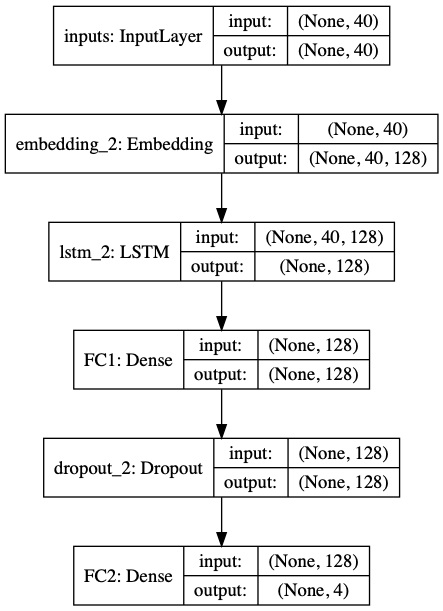

In [77]:
from keras.utils import plot_model
plot_model(model, 'LSTM.png', show_shapes=True)

In [80]:
model_fit = model.fit(train_seq_mat,train_y,batch_size=8,epochs=40,
                      validation_data=(val_seq_mat,val_y),
#                       callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)] ## 当val-loss不再提升时停止训练
                     )


Train on 180 samples, validate on 30 samples
Epoch 1/40
180/180 [==============================] - 3s 15ms/step - loss: 0.4378 - accuracy: 0.8611 - val_loss: 1.1229 - val_accuracy: 0.6000
Epoch 2/40
180/180 [==============================] - 3s 15ms/step - loss: 0.3482 - accuracy: 0.8667 - val_loss: 1.3182 - val_accuracy: 0.6000
Epoch 3/40
180/180 [==============================] - 3s 15ms/step - loss: 0.3402 - accuracy: 0.9000 - val_loss: 1.4466 - val_accuracy: 0.5333
Epoch 4/40
180/180 [==============================] - 3s 15ms/step - loss: 0.2724 - accuracy: 0.8833 - val_loss: 1.5770 - val_accuracy: 0.4000
Epoch 5/40
180/180 [==============================] - 3s 15ms/step - loss: 0.2364 - accuracy: 0.9333 - val_loss: 1.3811 - val_accuracy: 0.5000
Epoch 6/40
180/180 [==============================] - 3s 15ms/step - loss: 0.2479 - accuracy: 0.9111 - val_loss: 1.5238 - val_accuracy: 0.5000
Epoch 7/40
180/180 [==============================] - 3s 15ms/step - loss: 0.2146 - accuracy: 0.9

In [91]:
# Using the test set to test the model.
test_pre = model.evaluate(test_seq_mat, test_y)

39/39 [==============================] - 0s 3ms/step


In [92]:
test_pre

[6.076312419695732, 0.4871794879436493]

In [93]:
model_fit.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

In [97]:
model_fit.history['val_accuracy']

[0.6000000238418579,
 0.6000000238418579,
 0.5333333611488342,
 0.4000000059604645,
 0.5,
 0.5,
 0.5333333611488342,
 0.5333333611488342,
 0.5,
 0.5,
 0.5333333611488342,
 0.46666666865348816,
 0.5666666626930237,
 0.5,
 0.5666666626930237,
 0.5333333611488342,
 0.5,
 0.4333333373069763,
 0.6000000238418579,
 0.5333333611488342,
 0.5666666626930237,
 0.5666666626930237,
 0.5333333611488342,
 0.5,
 0.46666666865348816,
 0.4333333373069763,
 0.46666666865348816,
 0.46666666865348816,
 0.5,
 0.4333333373069763,
 0.4333333373069763,
 0.46666666865348816,
 0.5333333611488342,
 0.5,
 0.5333333611488342,
 0.4333333373069763,
 0.5333333611488342,
 0.46666666865348816,
 0.46666666865348816,
 0.5]

## 1.Bi-LSTM(Bi-directional Long Short-Trem Memnory)

In [111]:
inputs = Input(name='inputs',shape=[max_len])
## Embedding(size of word table,size of batch,length of every news)
layer = Embedding(max_words+1,128,input_length=max_len)(inputs)
layer = Bidirectional(LSTM(128))(layer)
layer = Dense(128,activation="relu",name="FC1")(layer)
layer = Dropout(0.5)(layer)
layer = Dense(4,activation="softmax",name="FC2")(layer)
model = Model(inputs=inputs,outputs=layer)
model.summary()
model.compile(loss="categorical_crossentropy",optimizer=RMSprop(),metrics=["accuracy"])

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 40)                0         
_________________________________________________________________
embedding_8 (Embedding)      (None, 40, 128)           256128    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 256)               263168    
_________________________________________________________________
FC1 (Dense)                  (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
FC2 (Dense)                  (None, 4)                 516       
Total params: 552,708
Trainable params: 552,708
Non-trainable params: 0
_____________________________________________________

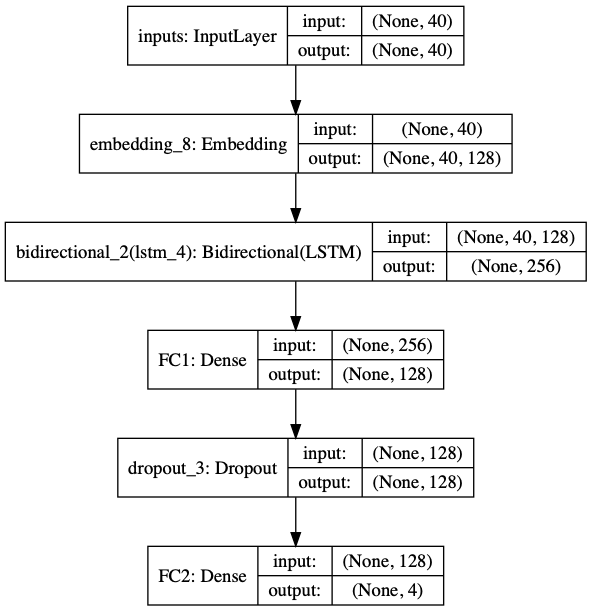

In [112]:
from keras.utils import plot_model
plot_model(model, 'Bi-LSTM.png', show_shapes=True)

In [113]:
model_fit = model.fit(train_seq_mat,train_y,batch_size=8,epochs=40,
                      validation_data=(val_seq_mat,val_y),
#                       callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)] ## 当val-loss不再提升时停止训练
                     )

/Users/zhangxin/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 180 samples, validate on 30 samples
Epoch 1/40
180/180 [==============================] - 10s 55ms/step - loss: 1.3654 - accuracy: 0.3111 - val_loss: 1.4035 - val_accuracy: 0.3000
Epoch 2/40
180/180 [==============================] - 6s 32ms/step - loss: 1.2836 - accuracy: 0.3944 - val_loss: 1.8161 - val_accuracy: 0.3000
Epoch 3/40
180/180 [==============================] - 4s 24ms/step - loss: 1.1899 - accuracy: 0.4889 - val_loss: 1.2326 - val_accuracy: 0.4000
Epoch 4/40
180/180 [==============================] - 4s 24ms/step - loss: 0.9931 - accuracy: 0.5833 - val_loss: 1.0977 - val_accuracy: 0.5000
Epoch 5/40
180/180 [==============================] - 5s 25ms/step - loss: 0.8453 - accuracy: 0.6111 - val_loss: 1.0759 - val_accuracy: 0.5667
Epoch 6/40
180/180 [==============================] - 5s 29ms/step - loss: 0.6908 - accuracy: 0.7333 - val_loss: 0.9636 - val_accuracy: 0.5667
Epoch 7/40
180/180 [==============================] - 4s 24ms/step - loss: 0.6291 - accuracy: 0.

In [114]:
# Using the test set to test the model.
test_pre = model.evaluate(test_seq_mat, test_y)

39/39 [==============================] - 0s 7ms/step


In [115]:
test_pre

[3.8896943605863132, 0.5641025900840759]

In [116]:
model_fit.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

In [119]:
f = open('history.txt','w')
f.write(str(model_fit.history))
f.close()

In [118]:
# Using the test set to test the model.
test_pre = model.predict(test_seq_mat)
## Judge the predect result using the confusion matrix.
confm = metrics.confusion_matrix(np.argmax(test_pre,axis=1),np.argmax(test_y,axis=1))

print(metrics.classification_report(np.argmax(test_pre,axis=1),np.argmax(test_y,axis=1)))

              precision    recall  f1-score   support

           0       0.50      0.60      0.55         5
           1       0.33      0.50      0.40         6
           2       0.55      0.60      0.57        10
           3       0.77      0.56      0.65        18

    accuracy                           0.56        39
   macro avg       0.54      0.56      0.54        39
weighted avg       0.61      0.56      0.58        39



In [122]:
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(answer_ext.answer_cut.astype(str))

In [123]:
import pickle
# saving
with open('tok.pickle', 'wb') as handle:
    pickle.dump(tok, handle, protocol=pickle.HIGHEST_PROTOCOL)

# loading
with open('tok.pickle', 'rb') as handle:
    tok = pickle.load(handle)

In [125]:
from keras.models import load_model
model.save('BiLSTM_model.h5')  
del model  # deletes the existing model